In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:

X = np.load('X_finetune.npy') 
y = np.load('y_finetune.npy') 


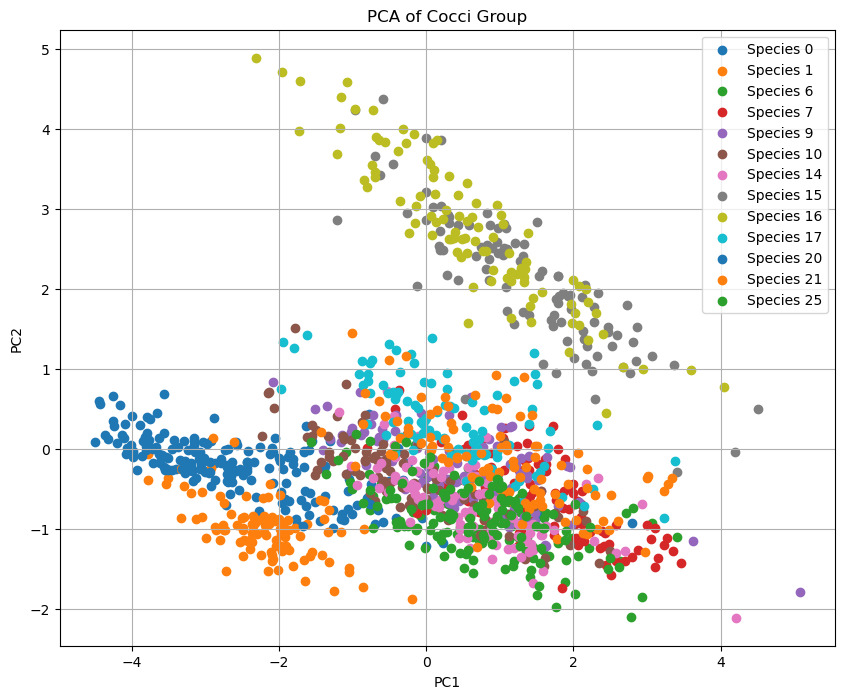

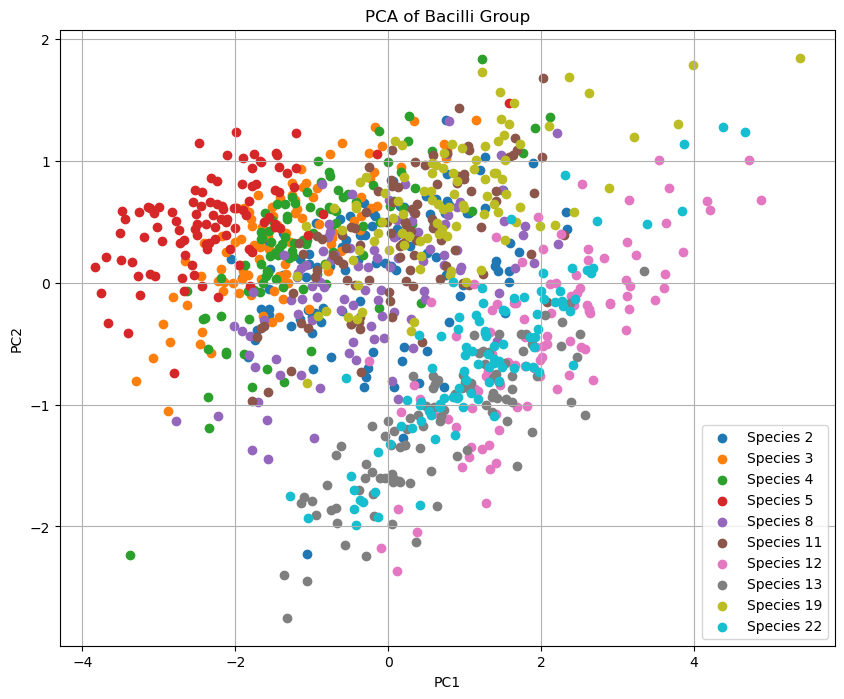

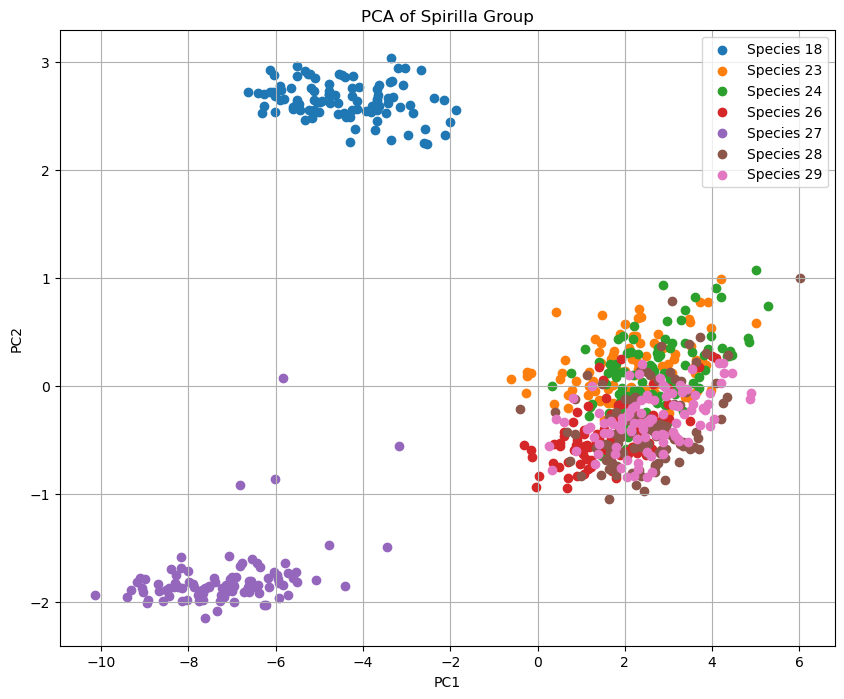

In [5]:

# Define groups based on shape (example)
shape_groups = {
    "Cocci": [0, 1, 6, 7, 9, 10, 14, 15, 16, 17, 20, 21, 25],
    "Bacilli": [2, 3, 4, 5, 8, 11, 12, 13, 19, 22],
    "Spirilla": [18, 23, 24, 26, 27, 28, 29]
}

# Initialize PCA
n_components = 2 
pca = PCA(n_components=n_components)

# Perform PCA for each group
for shape, species_indices in shape_groups.items():
    # Filter the dataset for the current group
    indices = np.isin(y, species_indices)
    X_group = X[indices]
    y_group = y[indices]
    
    # Apply PCA
    X_pca = pca.fit_transform(X_group)
    
    # Plot the PCA result
    plt.figure(figsize=(10, 8))
    for i, species_index in enumerate(species_indices):
        plt.scatter(X_pca[y_group == species_index, 0], X_pca[y_group == species_index, 1], label=f"Species {species_index}")
    
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(f'PCA of {shape} Group')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


PCA of Cocci Group - Explained variance by each component: [0.19927788 0.10111312 0.03231873]
Cumulative explained variance: [0.19927788 0.300391   0.33270973]


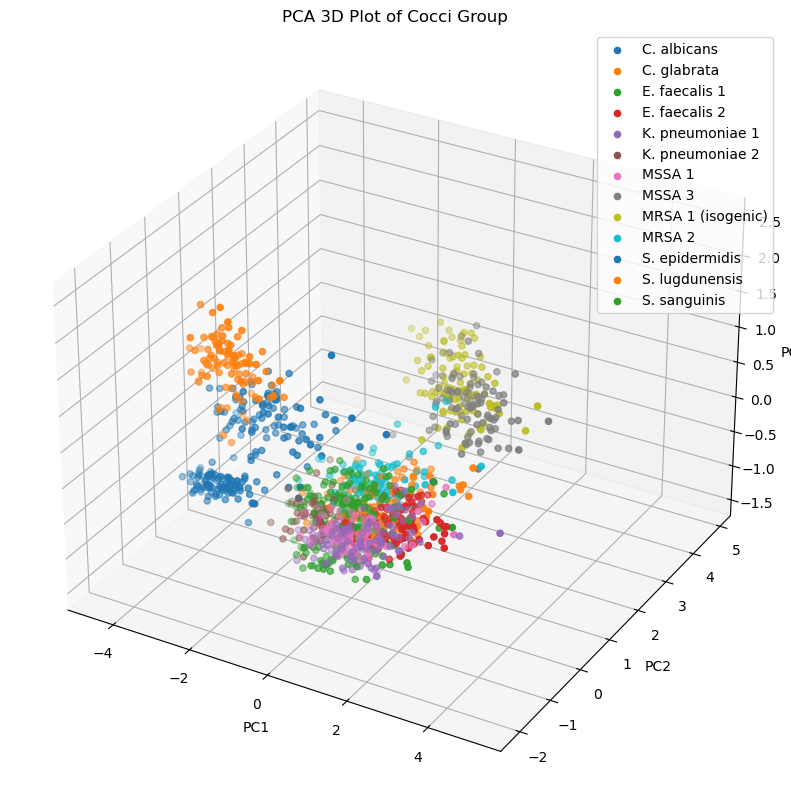

PCA of Bacilli Group - Explained variance by each component: [0.17749508 0.04335775 0.03101948]
Cumulative explained variance: [0.17749508 0.22085283 0.25187231]


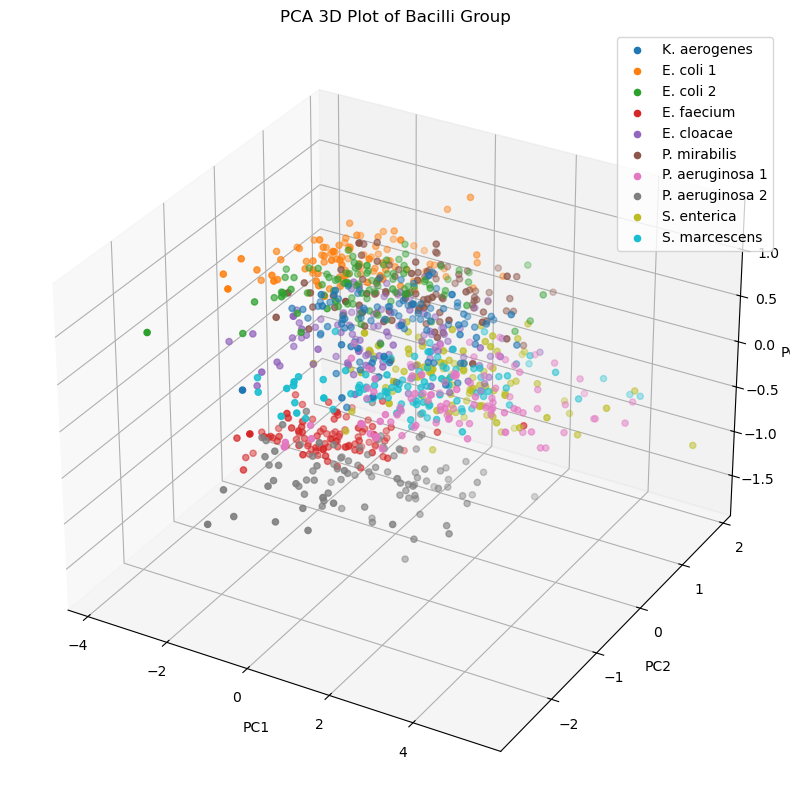

PCA of Spirilla Group - Explained variance by each component: [0.57671014 0.06083288 0.01863785]
Cumulative explained variance: [0.57671014 0.63754302 0.65618086]


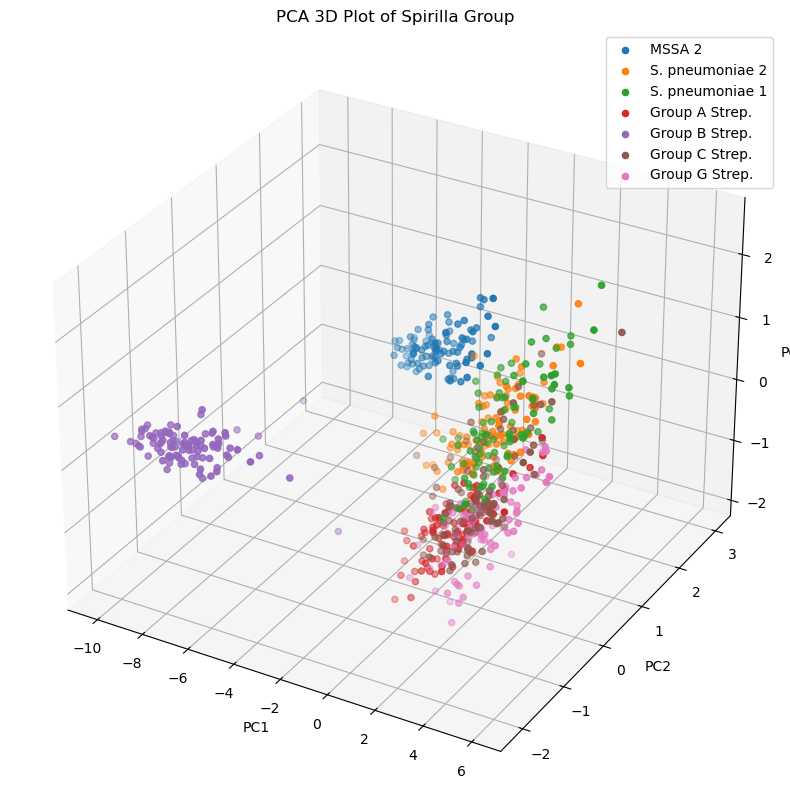

In [9]:
import config 
# Initialize PCA for 3 components
n_components = 3  
pca = PCA(n_components=n_components)

# Perform PCA for each group
for shape, species_indices in shape_groups.items():
    # Filter the dataset for the current group
    indices = np.isin(y, species_indices)
    X_group = X[indices]
    y_group = y[indices]
    
    # Apply PCA
    X_pca = pca.fit_transform(X_group)
    
    # Explained variance
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)
    
    # Print explained variance
    print(f"PCA of {shape} Group - Explained variance by each component: {explained_variance}")
    print(f"Cumulative explained variance: {cumulative_variance}")
    
    # 3D Plotting
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    for i, species_index in enumerate(species_indices):
        label = config.STRAINS[species_index]  # Get species name from config.STRAINS
        ax.scatter(X_pca[y_group == species_index, 0], X_pca[y_group == species_index, 1], X_pca[y_group == species_index, 2], label=label)
    
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title(f'PCA 3D Plot of {shape} Group')
    ax.legend(loc='best')
    
    plt.show()

PCA of Cocci Group - Explained variance by each component: [0.19927788 0.10111312 0.03231873]
Cumulative explained variance: [0.19927788 0.300391   0.33270973]


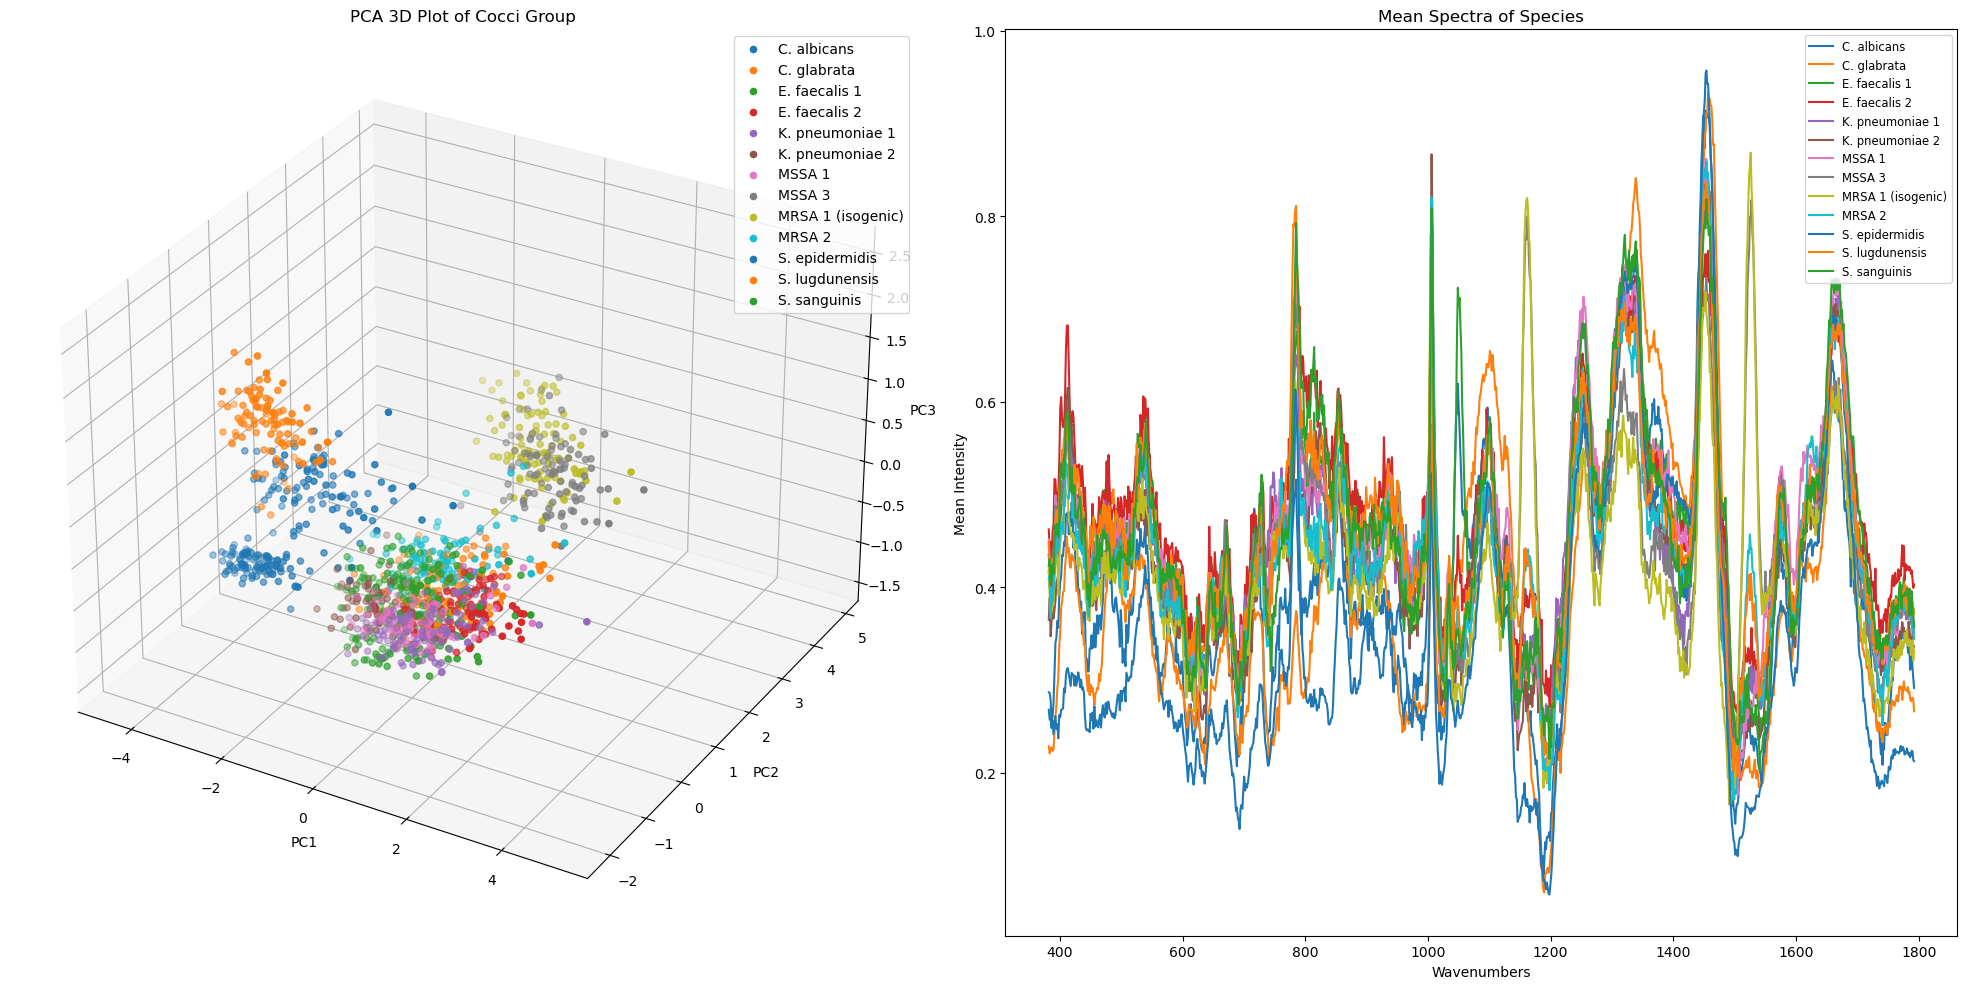

PCA of Bacilli Group - Explained variance by each component: [0.17749508 0.04335775 0.03101948]
Cumulative explained variance: [0.17749508 0.22085283 0.25187231]


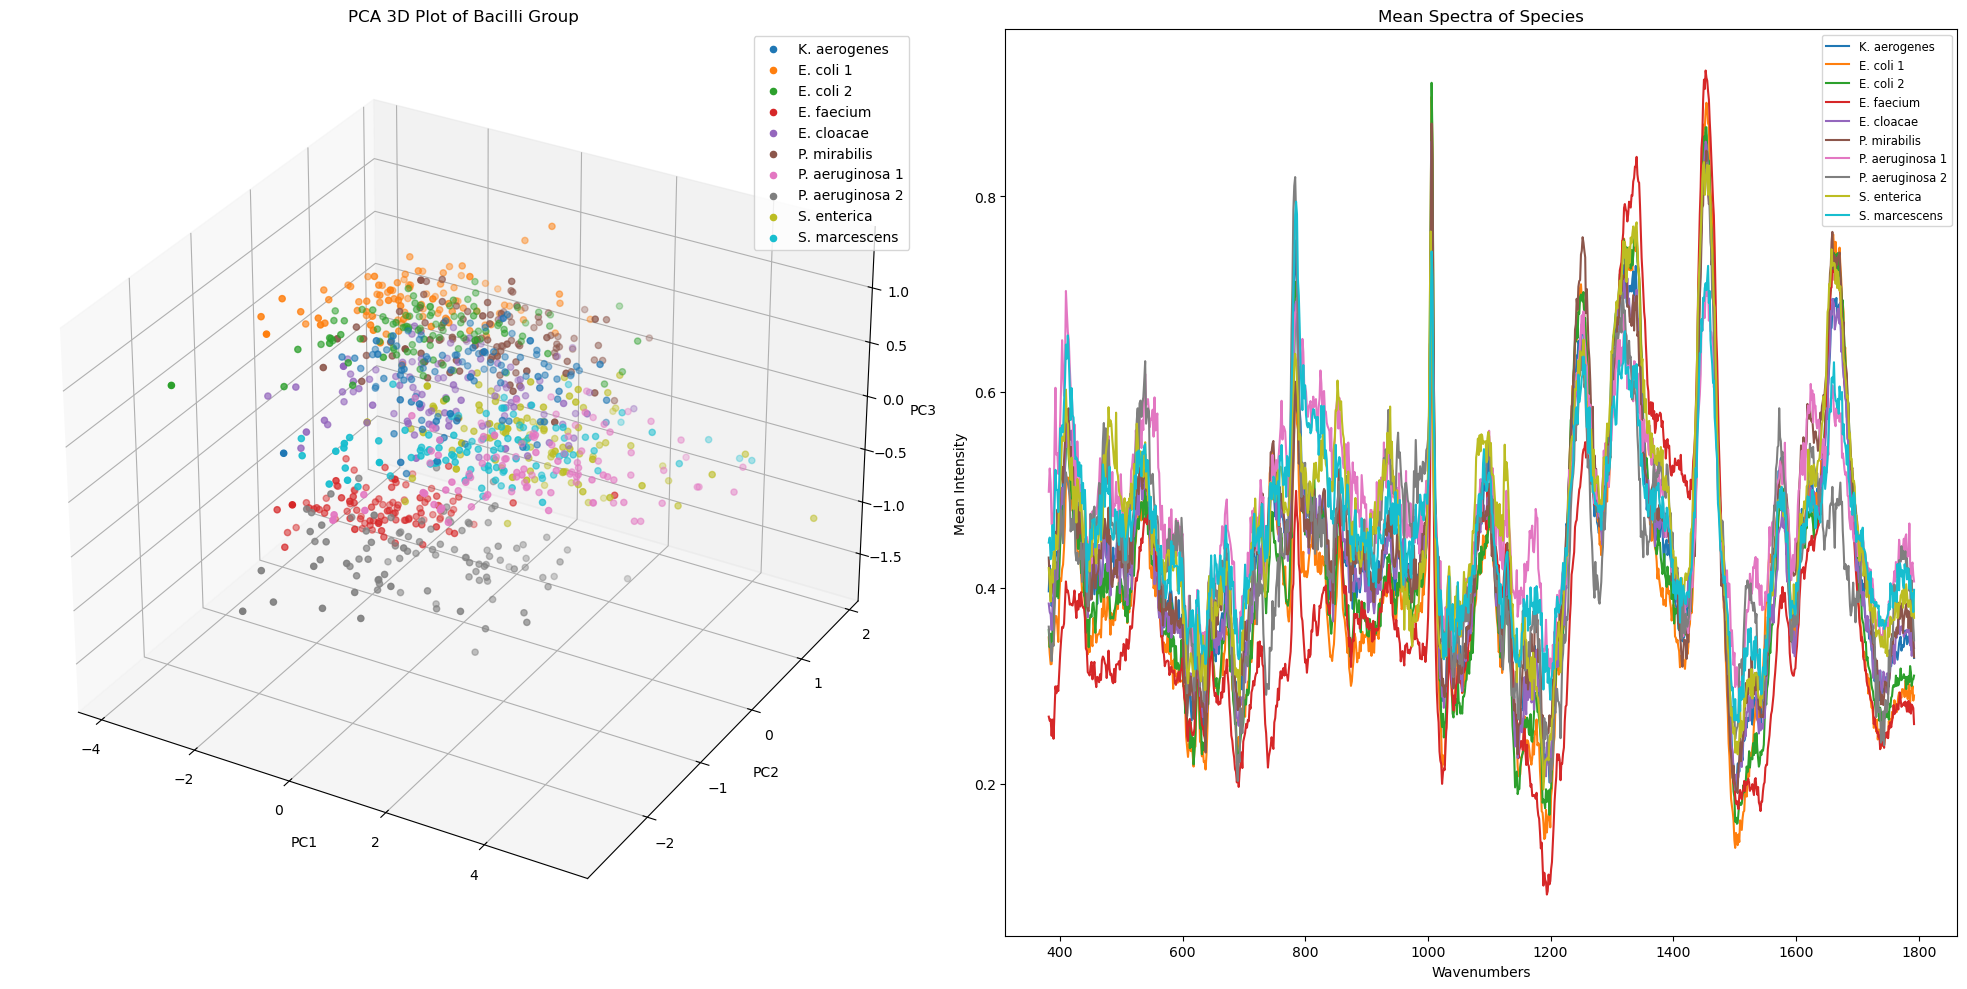

PCA of Spirilla Group - Explained variance by each component: [0.57671014 0.06083288 0.01863785]
Cumulative explained variance: [0.57671014 0.63754302 0.65618086]


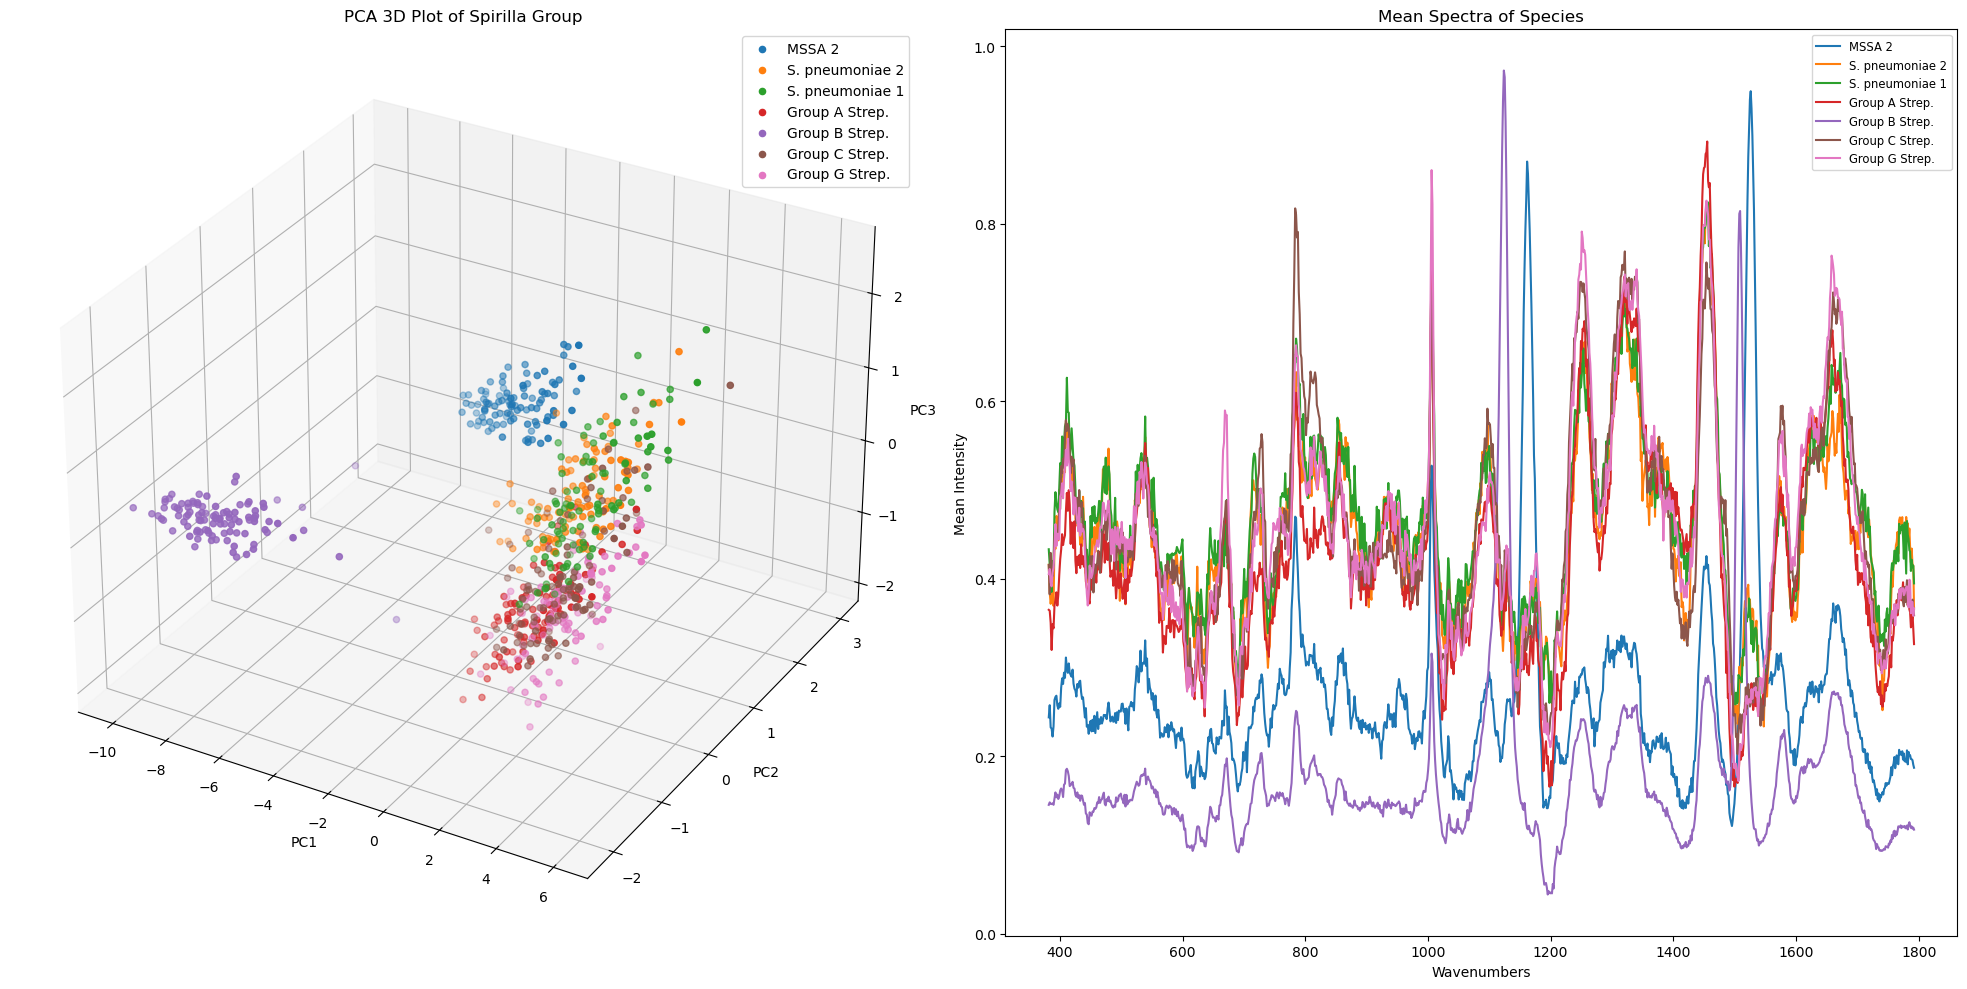

In [11]:


shape_groups = {
    "Cocci": [0, 1, 6, 7, 9, 10, 14, 15, 16, 17, 20, 21, 25],
    "Bacilli": [2, 3, 4, 5, 8, 11, 12, 13, 19, 22],
    "Spirilla": [18, 23, 24, 26, 27, 28, 29]
}


n_components = 3  
pca = PCA(n_components=n_components)

# Perform PCA for each group
for shape, species_indices in shape_groups.items():
    # Filter the dataset for the current group
    indices = np.isin(y, species_indices)
    X_group = X[indices]
    y_group = y[indices]
    
    # Apply PCA
    X_pca = pca.fit_transform(X_group)
    
    # Explained variance
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)
    
    # Print explained variance
    print(f"PCA of {shape} Group - Explained variance by each component: {explained_variance}")
    print(f"Cumulative explained variance: {cumulative_variance}")
    
    # Create a figure with two subplots: one for the 3D PCA plot, one for the spectra
    fig = plt.figure(figsize=(20, 10))
    
    # 3D Plotting (left side)
    ax1 = fig.add_subplot(121, projection='3d')
    for i, species_index in enumerate(species_indices):
        label = config.STRAINS[species_index]  # Get species name from config.STRAINS
        ax1.scatter(X_pca[y_group == species_index, 0], X_pca[y_group == species_index, 1], X_pca[y_group == species_index, 2], label=label)
    
    ax1.set_xlabel('PC1')
    ax1.set_ylabel('PC2')
    ax1.set_zlabel('PC3')
    ax1.set_title(f'PCA 3D Plot of {shape} Group')
    ax1.legend(loc='best')
    
    # Spectra Plotting (right side)
    ax2 = fig.add_subplot(122)
    for i, species_index in enumerate(species_indices):
        label = config.STRAINS[species_index]  # Get species name from config.STRAINS
        mean_spectrum = X_group[y_group == species_index].mean(axis=0)
        ax2.plot(wavenumbers, mean_spectrum, label=label)
    
    ax2.set_xlabel('Wavenumbers')
    ax2.set_ylabel('Mean Intensity')
    ax2.set_title('Mean Spectra of Species')
    ax2.legend(loc='upper right', fontsize='small')
    
    plt.tight_layout()
    plt.show()


PCA of Cocci Group - Explained variance by each component: [0.19927788 0.10111312 0.03231873]
Cumulative explained variance: [0.19927788 0.300391   0.33270973]


PCA of Bacilli Group - Explained variance by each component: [0.17749508 0.04335775 0.03101948]
Cumulative explained variance: [0.17749508 0.22085283 0.25187231]


PCA of Spirilla Group - Explained variance by each component: [0.57671014 0.06083288 0.01863785]
Cumulative explained variance: [0.57671014 0.63754302 0.65618086]


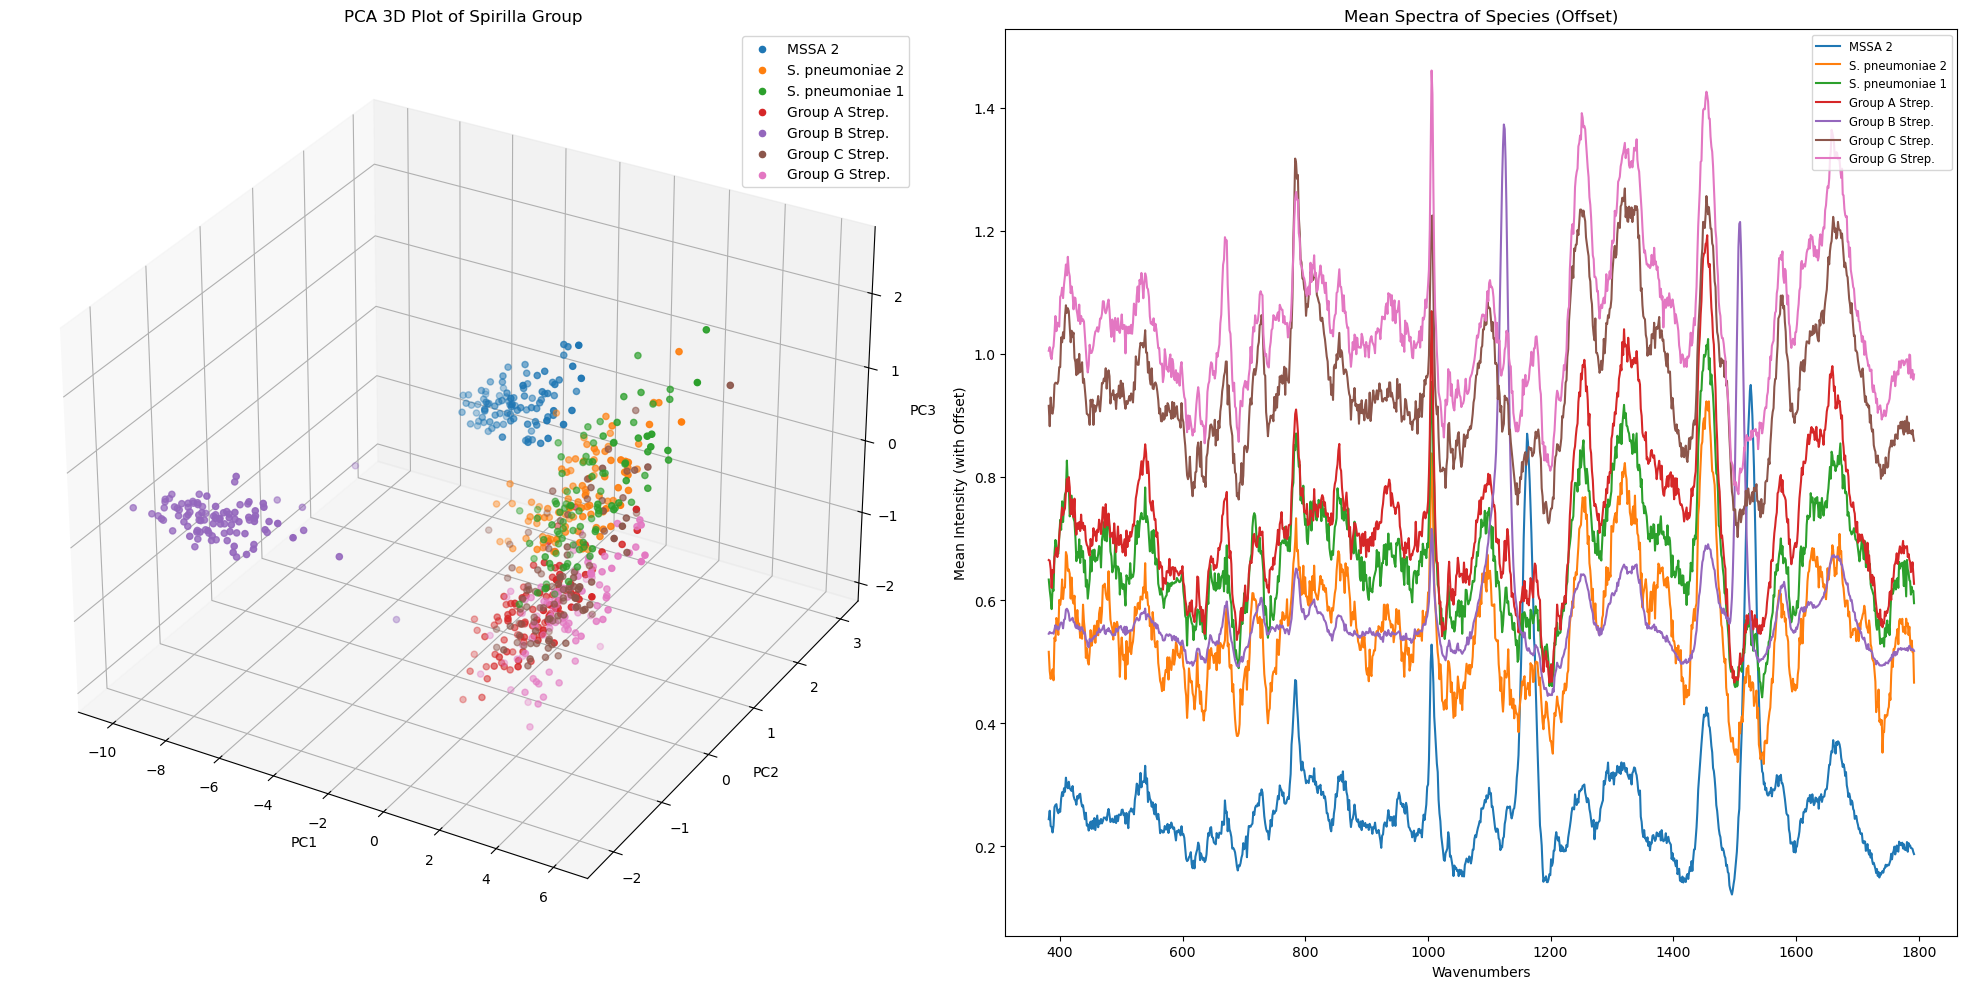

In [13]:


# Define groups based on shape using the STRAINS dictionary from config.py
shape_groups = {
    "Cocci": [0, 1, 6, 7, 9, 10, 14, 15, 16, 17, 20, 21, 25],
    "Bacilli": [2, 3, 4, 5, 8, 11, 12, 13, 19, 22],
    "Spirilla": [18, 23, 24, 26, 27, 28, 29]
}

# Initialize PCA for 3 components
n_components = 3  # We will keep 3 components for 3D plotting
pca = PCA(n_components=n_components)

# Offset factor for separating spectra
offset_factor = 0.1  # Adjust this to control the vertical spacing between spectra

# Perform PCA for each group
for shape, species_indices in shape_groups.items():
    # Filter the dataset for the current group
    indices = np.isin(y, species_indices)
    X_group = X[indices]
    y_group = y[indices]
    
    # Apply PCA
    X_pca = pca.fit_transform(X_group)
    
    # Explained variance
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)
    
    # Print explained variance
    print(f"PCA of {shape} Group - Explained variance by each component: {explained_variance}")
    print(f"Cumulative explained variance: {cumulative_variance}")
    
    # Create a figure with two subplots: one for the 3D PCA plot, one for the spectra
    fig = plt.figure(figsize=(20, 10))
    
    # 3D Plotting (left side)
    ax1 = fig.add_subplot(121, projection='3d')
    for i, species_index in enumerate(species_indices):
        label = config.STRAINS[species_index]  # Get species name from config.STRAINS
        ax1.scatter(X_pca[y_group == species_index, 0], X_pca[y_group == species_index, 1], X_pca[y_group == species_index, 2], label=label)
    
    ax1.set_xlabel('PC1')
    ax1.set_ylabel('PC2')
    ax1.set_zlabel('PC3')
    ax1.set_title(f'PCA 3D Plot of {shape} Group')
    ax1.legend(loc='best')
    
    # Spectra Plotting (right side)
    ax2 = fig.add_subplot(122)
    for i, species_index in enumerate(species_indices):
        label = config.STRAINS[species_index]  # Get species name from config.STRAINS
        mean_spectrum = X_group[y_group == species_index].mean(axis=0)
        ax2.plot(wavenumbers, mean_spectrum + i * offset_factor, label=label)  # Apply offset
    
    ax2.set_xlabel('Wavenumbers')
    ax2.set_ylabel('Mean Intensity (with Offset)')
    ax2.set_title('Mean Spectra of Species (Offset)')
    ax2.legend(loc='upper right', fontsize='small')
    
    plt.tight_layout()
    plt.show()
